In [1]:
import numpy as np
from math import *
import numba
import random

import matplotlib.pyplot as plt

In [31]:
@numba.njit
def diffusion(v, beta, a, tau, dt=1e-3, sigma = 1.0):
	#np.random.seed(3)
	t = tau

	y = beta * a
	y_data = [y]

	while(not (y >= a or y <= 0)):
		z = np.random.normal(loc=0, scale=sigma)
		y += v*dt + sigma*np.sqrt(dt)*z

		t+=dt

		y_data.append(y)

	if y >= a:
		return 1, t
	else:
		return 0, t

#0: upper: 0.969, lower: 0.957, difference: 0.012, Drift: 0.500000
#1: upper: 0.956, lower: 0.965, difference: -0.010, Drift: 0.540000
#2: upper: 0.953, lower: 0.959, difference: -0.007, Drift: 0.580000
#3: upper: 0.961, lower: 0.962, difference: -0.001, Drift: 0.620000
#4: upper: 0.952, lower: 0.955, difference: -0.003, Drift: 0.660000
#5: upper: 0.961, lower: 0.970, difference: -0.008, Drift: 0.700000
#6: upper: 0.953, lower: 0.956, difference: -0.003, Drift: 0.740000
#7: upper: 0.958, lower: 0.968, difference: -0.010, Drift: 0.780000
#8: upper: 0.956, lower: 0.973, difference: -0.017, Drift: 0.820000
#9: upper: 0.948, lower: 0.955, difference: -0.006, Drift: 0.860000
#10: upper: 0.950, lower: 0.938, difference: 0.011, Drift: 0.900000
#11: upper: 0.949, lower: 0.939, difference: 0.010, Drift: 0.940000
#12: upper: 0.955, lower: 0.942, difference: 0.013, Drift: 0.980000
#13: upper: 0.947, lower: 0.947, difference: -0.001, Drift: 1.020000
#14: upper: 0.949, lower: 0.935, difference: 0.0

Text(0.5, 1.0, 'dt Vs Drift')

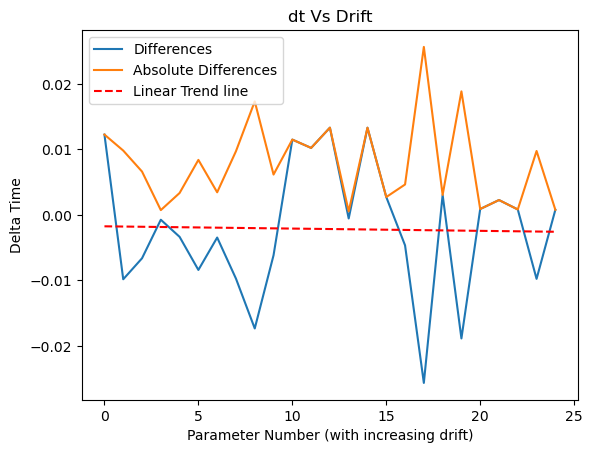

In [70]:
N = 2000
final_results = []
differences = []
for i in range(25):
	params = {
		'v' : 0.5 + i/25,
		'a' : 1.0,
		'beta' : 0.5,
		'tau' : 0.7
	}

	lower_bound_times = []
	upper_bound_times = []
	for j in range(N):
		a = diffusion(**params)
		if a[0] == 0:
			lower_bound_times.append(a[1])
		else:
			upper_bound_times.append(a[1])


	if len(lower_bound_times)!=0 and len(upper_bound_times)!=0:
		differences.append(sum(upper_bound_times)/len(upper_bound_times) - sum(lower_bound_times)/len(lower_bound_times))
		print(f'#{i}: upper: {sum(upper_bound_times)/len(upper_bound_times):.3f}, lower: {sum(lower_bound_times)/len(lower_bound_times):.3f}, difference: {sum(upper_bound_times)/len(upper_bound_times) - sum(lower_bound_times)/len(lower_bound_times):.3f}, Drift: {params["v"]:3f}')

plt.plot(differences, label= 'Differences')
plt.plot(np.abs(np.array(differences)), label = 'Absolute Differences')

# Fit a 1st degree polynomial (linear fit) to the data
z = np.polyfit(np.arange(len(differences)), np.array(differences), 1)
p = np.poly1d(z)

# Plot the trend line
plt.plot(np.arange(len(differences)), p(np.arange(len(differences))), 'r--', label='Linear Trend line')
plt.legend()
plt.ylabel('Delta Time')
plt.xlabel('Parameter Number (with increasing drift)')
plt.title('dt Vs Drift')



#0: upper: 0.962, lower: 0.965, difference: -0.004, Drift: 0.500000
#1: upper: 0.978, lower: 0.992, difference: -0.014, Drift: 0.500000
#2: upper: 1.000, lower: 0.993, difference: 0.006, Drift: 0.500000
#3: upper: 1.021, lower: 1.032, difference: -0.011, Drift: 0.500000
#4: upper: 1.051, lower: 1.054, difference: -0.004, Drift: 0.500000
#5: upper: 1.084, lower: 1.082, difference: 0.002, Drift: 0.500000
#6: upper: 1.086, lower: 1.085, difference: 0.001, Drift: 0.500000
#7: upper: 1.130, lower: 1.140, difference: -0.010, Drift: 0.500000
#8: upper: 1.142, lower: 1.152, difference: -0.010, Drift: 0.500000
#9: upper: 1.158, lower: 1.153, difference: 0.005, Drift: 0.500000
#10: upper: 1.213, lower: 1.217, difference: -0.004, Drift: 0.500000
#11: upper: 1.225, lower: 1.209, difference: 0.017, Drift: 0.500000
#12: upper: 1.244, lower: 1.247, difference: -0.003, Drift: 0.500000
#13: upper: 1.269, lower: 1.271, difference: -0.001, Drift: 0.500000
#14: upper: 1.318, lower: 1.307, difference: 0.01

Text(0.5, 1.0, 'dt Vs Alpha')

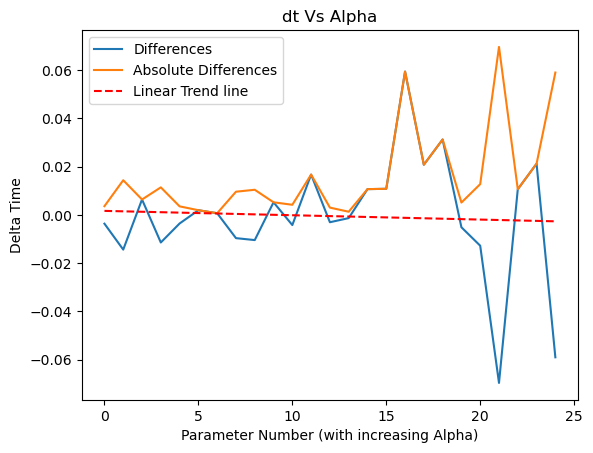

In [68]:
N = 2000
final_results = []
differences = []
for i in range(25):
	params = {
		'v' : 0.5,
		'a' : 1.0 + i/25,
		'beta' : 0.5,
		'tau' : 0.7
	}

	lower_bound_times = []
	upper_bound_times = []
	for j in range(N):
		a = diffusion(**params)
		if a[0] == 0:
			lower_bound_times.append(a[1])
		else:
			upper_bound_times.append(a[1])


	if len(lower_bound_times)!=0 and len(upper_bound_times)!=0:
		differences.append(sum(upper_bound_times)/len(upper_bound_times) - sum(lower_bound_times)/len(lower_bound_times))
		print(f'#{i}: upper: {sum(upper_bound_times)/len(upper_bound_times):.3f}, lower: {sum(lower_bound_times)/len(lower_bound_times):.3f}, difference: {sum(upper_bound_times)/len(upper_bound_times) - sum(lower_bound_times)/len(lower_bound_times):.3f}, Drift: {params["v"]:3f}')

plt.plot(differences, label= 'Differences')
plt.plot(np.abs(np.array(differences)), label = 'Absolute Differences')

# Fit a 1st degree polynomial (linear fit) to the data
z = np.polyfit(np.arange(len(differences)), np.array(differences), 1)
p = np.poly1d(z)

# Plot the trend line
plt.plot(np.arange(len(differences)), p(np.arange(len(differences))), 'r--', label='Linear Trend line')
plt.legend()
plt.ylabel('Delta Time')
plt.xlabel('Parameter Number (with increasing Alpha)')
plt.title('dt Vs Alpha')



#1: upper: 1.054, lower: 0.733, difference: 0.321, Drift: 0.500000
#2: upper: 1.050, lower: 0.767, difference: 0.284, Drift: 0.500000
#3: upper: 1.030, lower: 0.792, difference: 0.238, Drift: 0.500000
#4: upper: 1.034, lower: 0.815, difference: 0.219, Drift: 0.500000
#5: upper: 1.034, lower: 0.832, difference: 0.201, Drift: 0.500000
#6: upper: 1.034, lower: 0.845, difference: 0.189, Drift: 0.500000
#7: upper: 1.008, lower: 0.870, difference: 0.139, Drift: 0.500000
#8: upper: 1.010, lower: 0.895, difference: 0.115, Drift: 0.500000
#9: upper: 1.011, lower: 0.923, difference: 0.088, Drift: 0.500000
#10: upper: 0.986, lower: 0.919, difference: 0.066, Drift: 0.500000
#11: upper: 0.988, lower: 0.944, difference: 0.043, Drift: 0.500000
#12: upper: 0.978, lower: 0.953, difference: 0.025, Drift: 0.500000
#13: upper: 0.953, lower: 0.972, difference: -0.019, Drift: 0.500000
#14: upper: 0.933, lower: 0.996, difference: -0.063, Drift: 0.500000
#15: upper: 0.913, lower: 0.998, difference: -0.085, Dr

Text(0.5, 1.0, 'dt Vs Beta')

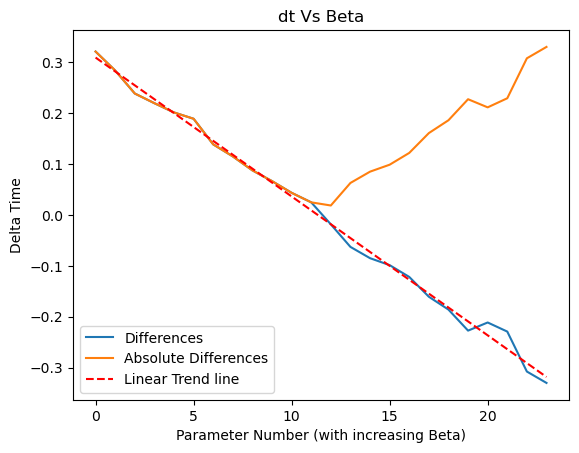

In [67]:
N = 2000
final_results = []
differences = []
for i in range(25):
	params = {
		'v' : 0.5,
		'a' : 1.0,
		'beta' : i/25,
		'tau' : 0.7
	}

	lower_bound_times = []
	upper_bound_times = []
	for j in range(N):
		a = diffusion(**params)
		if a[0] == 0:
			lower_bound_times.append(a[1])
		else:
			upper_bound_times.append(a[1])


	if len(lower_bound_times)!=0 and len(upper_bound_times)!=0:
		differences.append(sum(upper_bound_times)/len(upper_bound_times) - sum(lower_bound_times)/len(lower_bound_times))
		print(f'#{i}: upper: {sum(upper_bound_times)/len(upper_bound_times):.3f}, lower: {sum(lower_bound_times)/len(lower_bound_times):.3f}, difference: {sum(upper_bound_times)/len(upper_bound_times) - sum(lower_bound_times)/len(lower_bound_times):.3f}, Drift: {params["v"]:3f}')

plt.plot(differences, label= 'Differences')
plt.plot(np.abs(np.array(differences)), label = 'Absolute Differences')


# Fit a 1st degree polynomial (linear fit) to the data
z = np.polyfit(np.arange(len(differences)), np.array(differences), 1)
p = np.poly1d(z)

# Plot the trend line
plt.plot(np.arange(len(differences)), p(np.arange(len(differences))), 'r--', label='Linear Trend line')
plt.legend()
plt.ylabel('Delta Time')
plt.xlabel('Parameter Number (with increasing Beta)')
plt.title('dt Vs Beta')

